### Subsampling based on diversity scores

Variety - balance - similarity

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
annolex = pd.read_csv("../data/annolexical_adfontes.csv")

annolex["source_party"].value_counts()

source_party
Right         8694
Left          8541
Lean Left     6744
Lean Right    6231
Center        3621
Name: count, dtype: int64

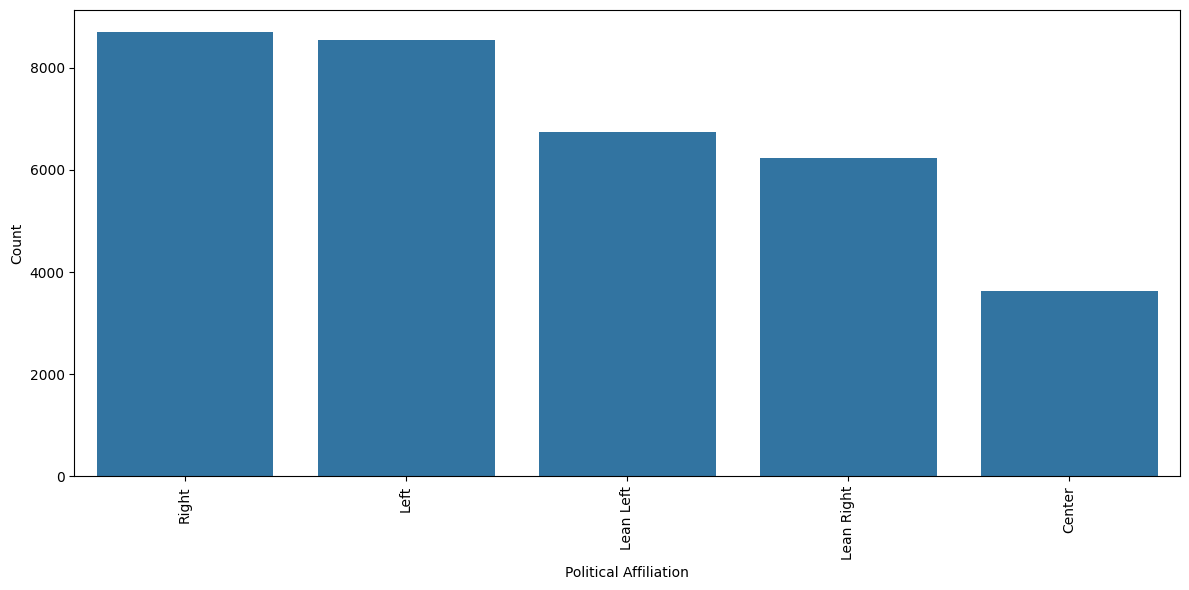

In [8]:
def plot_distribution (df):
    # Get the counts for each adfontes_score
    score_counts = df["source_party"].value_counts()

    # Plotting the distribution with seaborn
    plt.figure(figsize=(12, 6))
    sns.barplot(x=score_counts.index, y=score_counts.values)

    # Customize the plot
    plt.xlabel("Political Affiliation")
    plt.ylabel("Count")
    plt.xticks(rotation=90)  # Rotate x labels for better readability
    plt.tight_layout()

plot_distribution(annolex)

In [18]:
def generate_random_distribution(dim, alpha, size):
    return np.random.dirichlet([alpha] * dim, size)

alpha_values = [0.01, 0.1, 1, 10, 100, 1000]

ks = annolex["source_party"].unique()
dim = len(ks)

# Set seed 
np.random.seed(10)

subsamples = {}

# Generate samples for each alpha value
for alpha in alpha_values:
    # 3 distributions for each value
    distributions = generate_random_distribution(dim, alpha, 3)

    # Collect samples from dataset
    for idx, distribution in enumerate(distributions, start=1):
        sampled_data = []

        
        for score, sample_proportion in zip(ks, distribution):
            bin_data = annolex[annolex["source_party"] == score]
            
            # Set sample size to 3000
            sample_size = int(3000 * sample_proportion)
            
            # Sample data from bin, allowing replacement if sample size > bin size
            if sample_size > 0:
                sampled_data.append(bin_data.sample(n=sample_size, replace=(sample_size > len(bin_data))))

        subsamples[(alpha, idx)] = pd.concat(sampled_data)

# Generate 3 subsamples for perfectly balanced `inf_alpha`
inf_alpha = np.ones(dim) / dim  # Equal proportions for each score
for idx in range(1, 4):
    sampled_data = []
    
    for score, sample_proportion in zip(ks, inf_alpha):
        bin_data = annolex[annolex["source_party"] == score]
        sample_size = int(3000 * sample_proportion)
        
        if sample_size > 0:
            sampled_data.append(bin_data.sample(n=sample_size, replace=(sample_size > len(bin_data))))
    
    # Store the balanced sample as a unique entry
    subsamples[("inf", idx)] = pd.concat(sampled_data)

In [19]:
# Export subsamples as csv files 
for (alpha, idx), sampled_df in subsamples.items():
    alpha_str = str(alpha).replace('.', '_')  
    filename = f"../data/subsamples/alpha_{alpha_str}_idx_{idx}.csv"
    sampled_df.to_csv(filename, index=False)

C:\Users\sofik\AppData\Local\Temp\ipykernel_41668\503771524.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


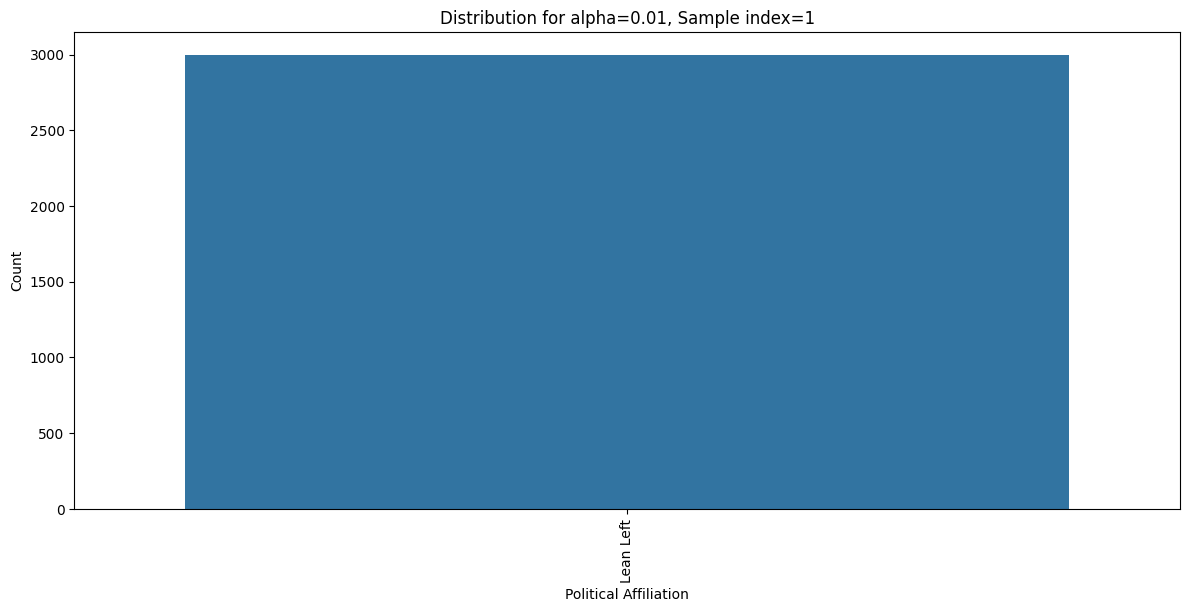

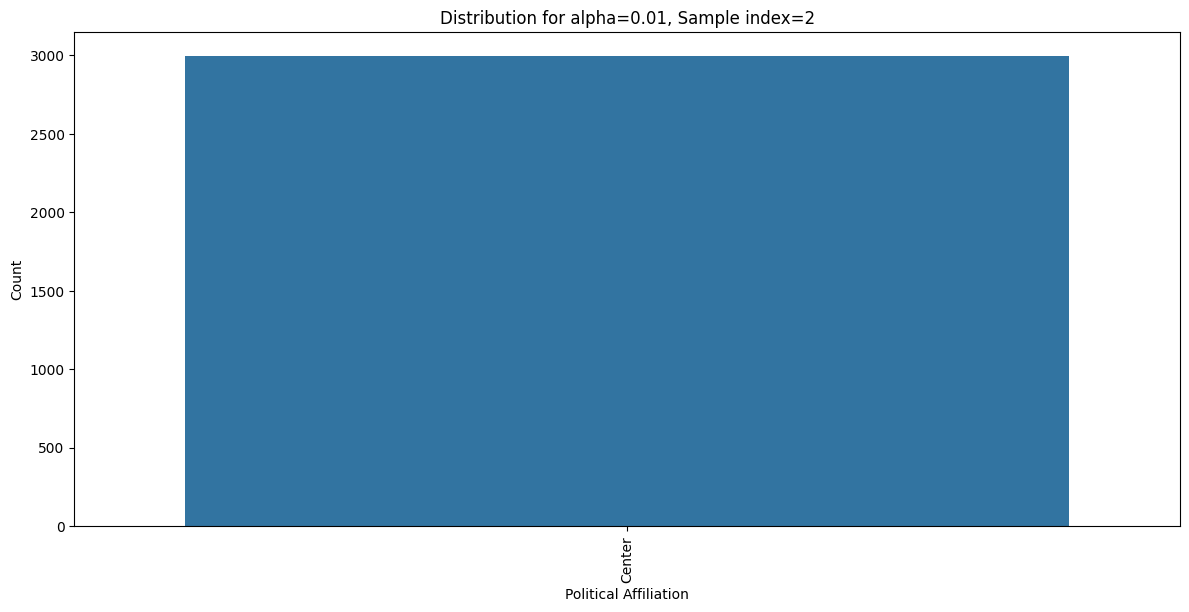

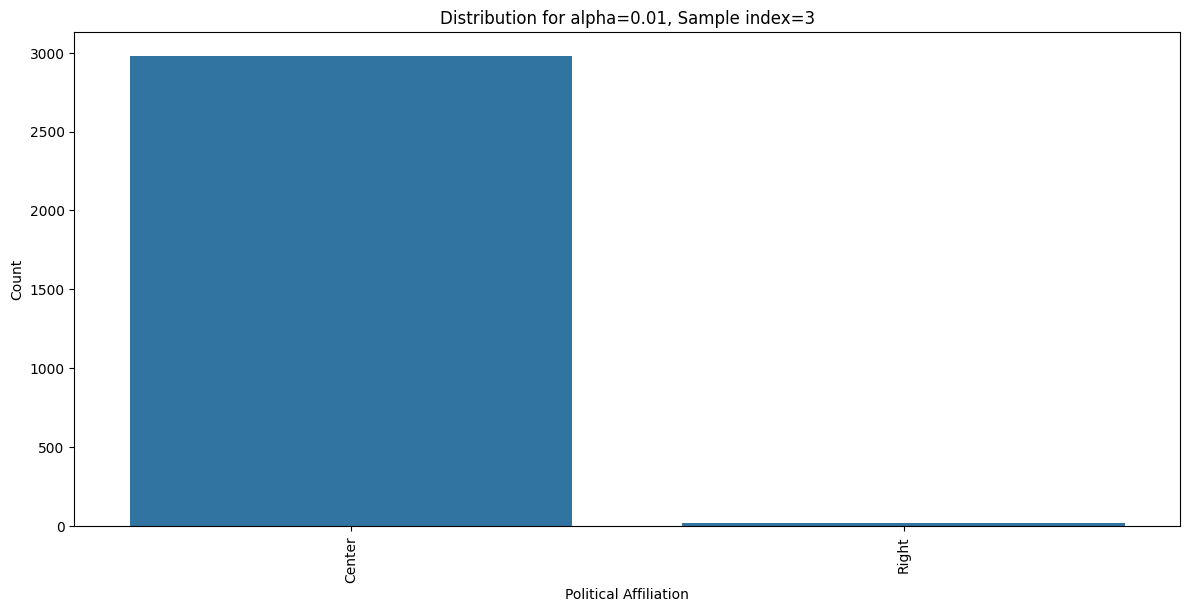

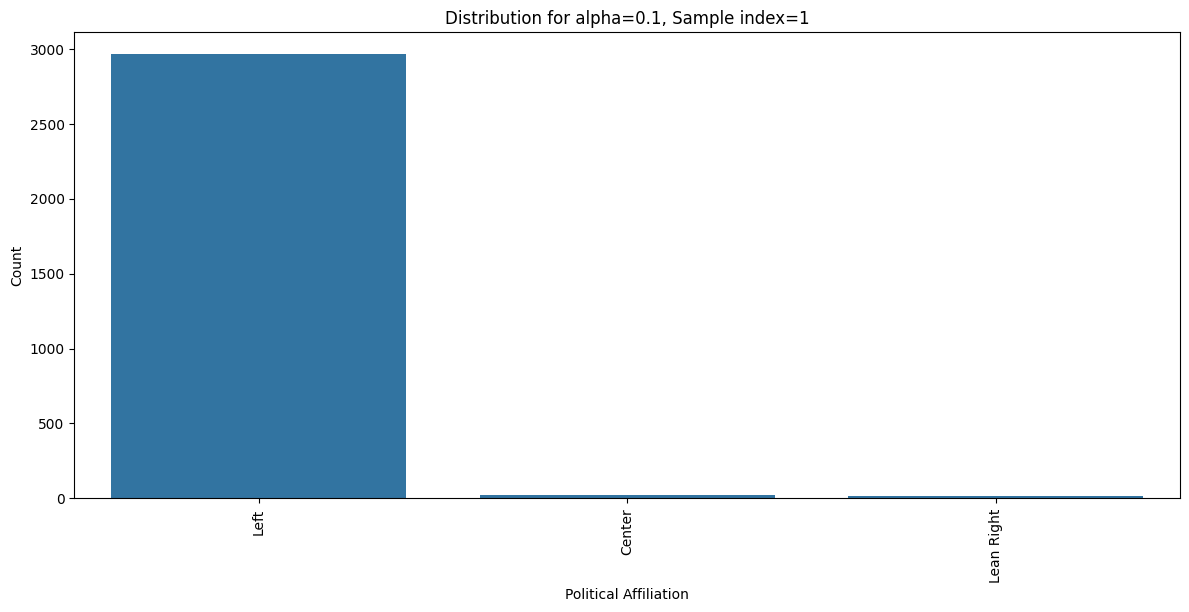

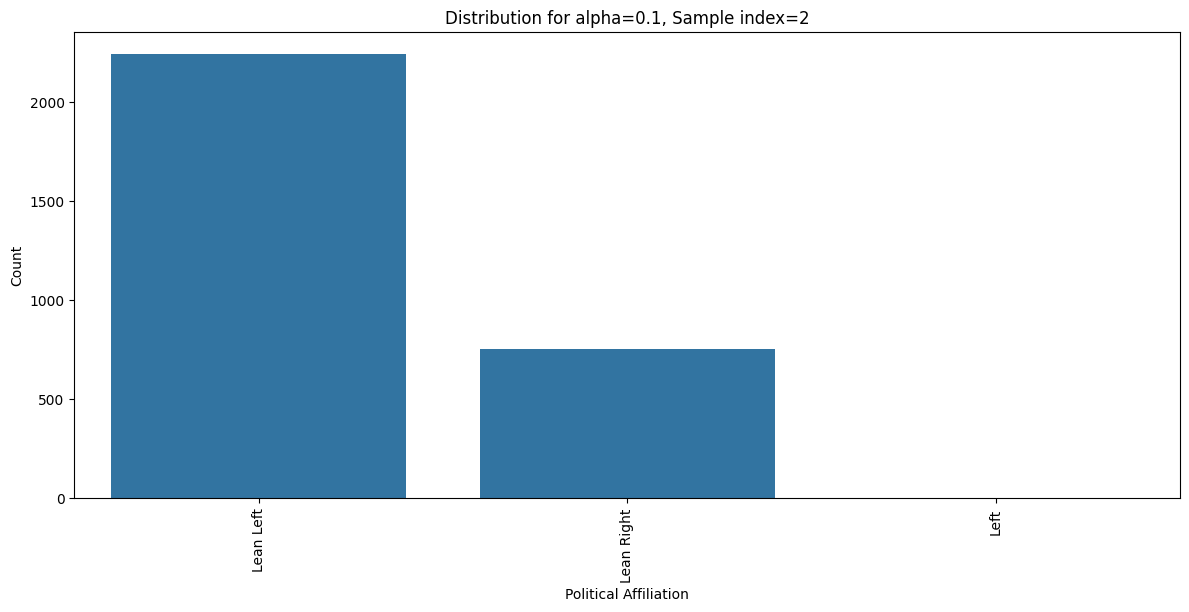

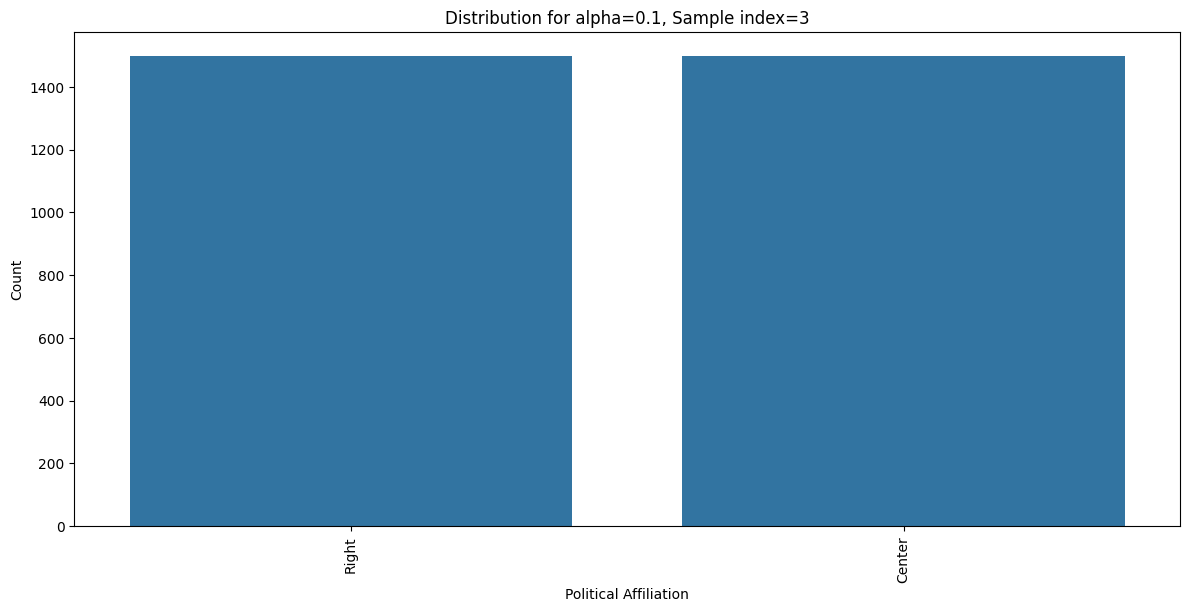

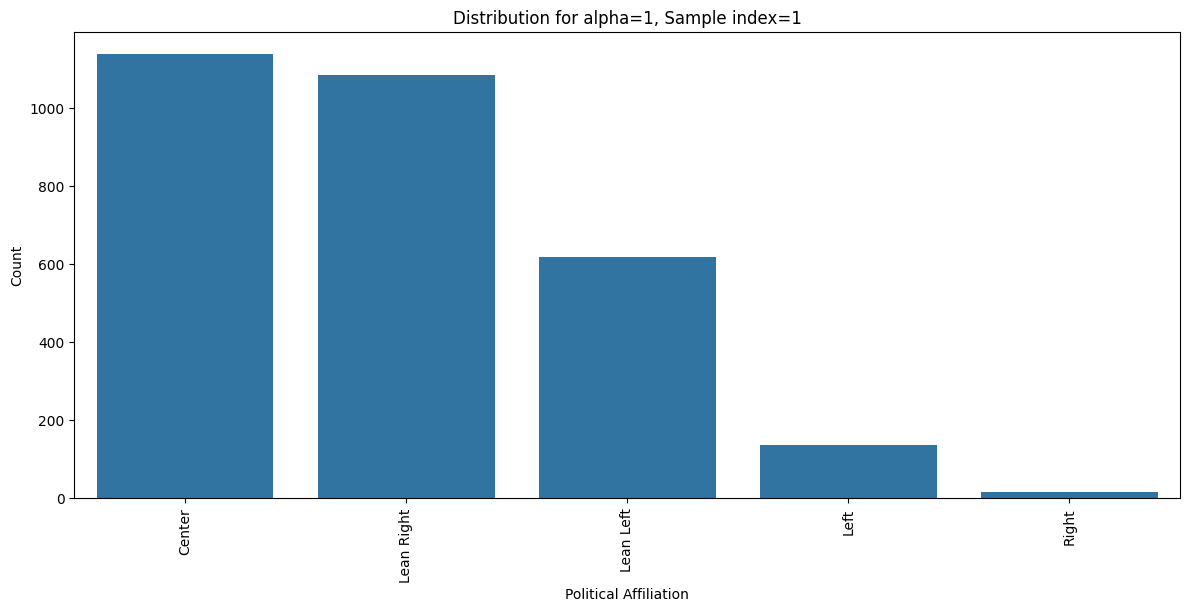

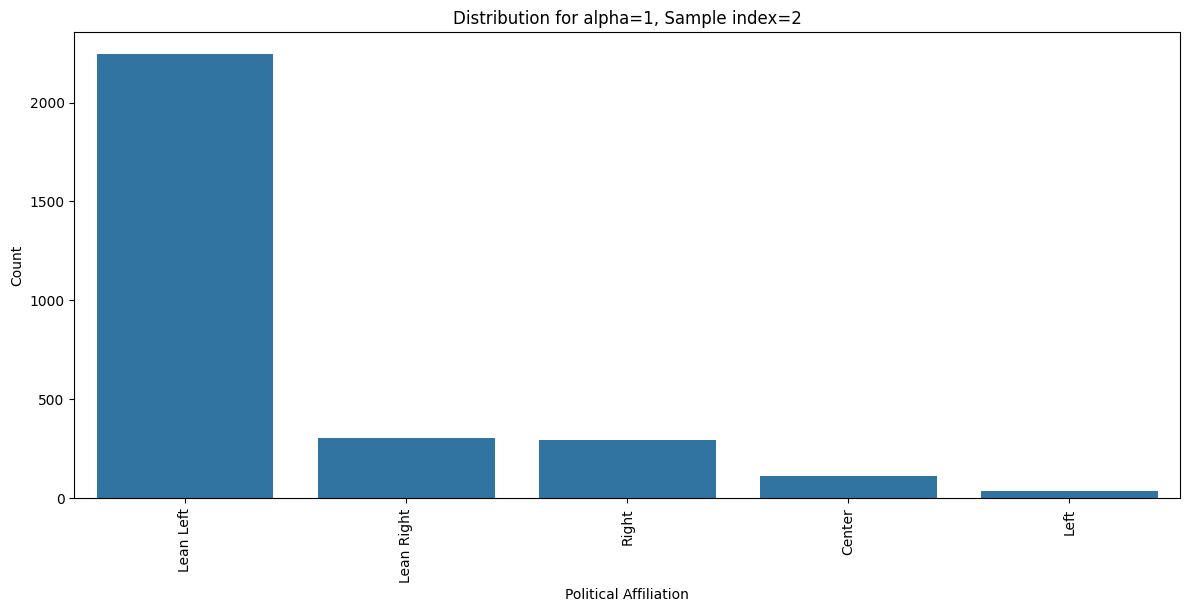

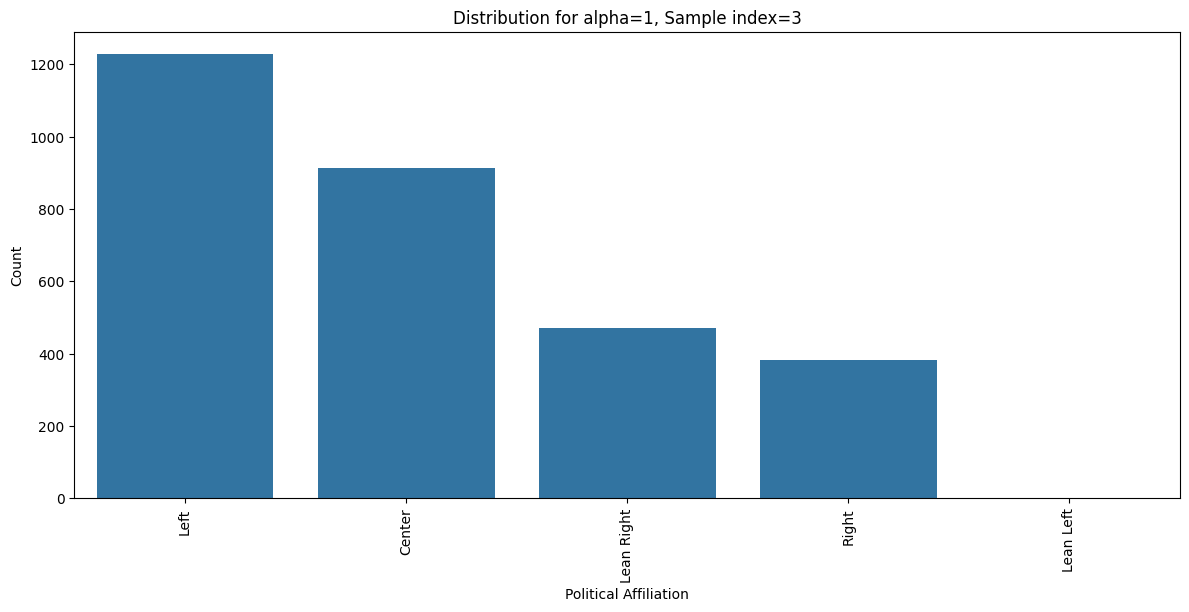

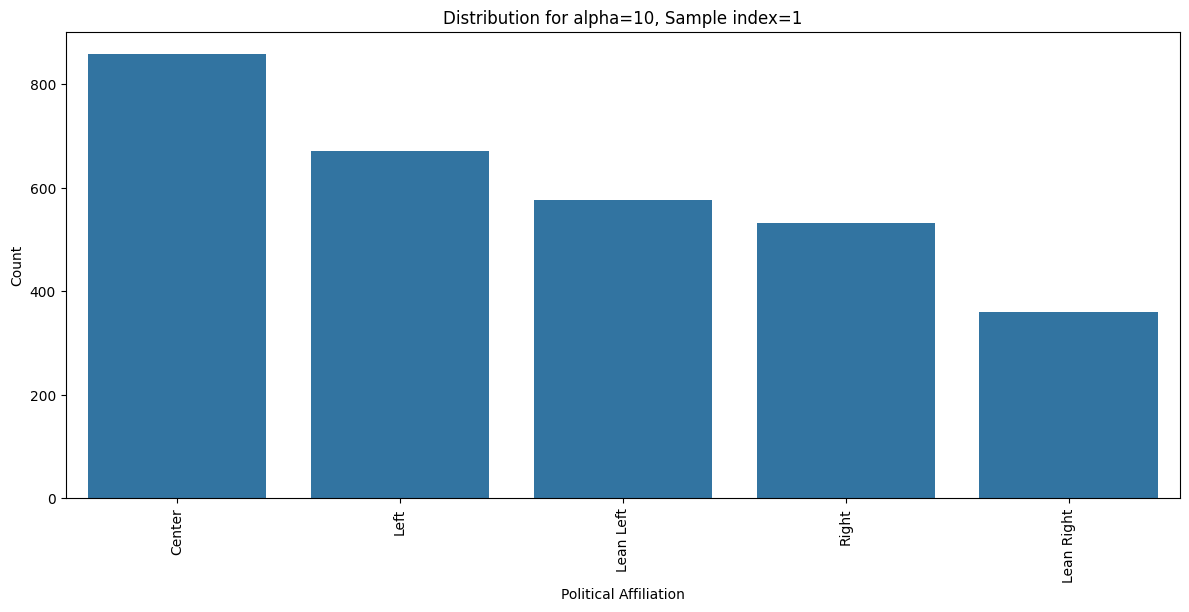

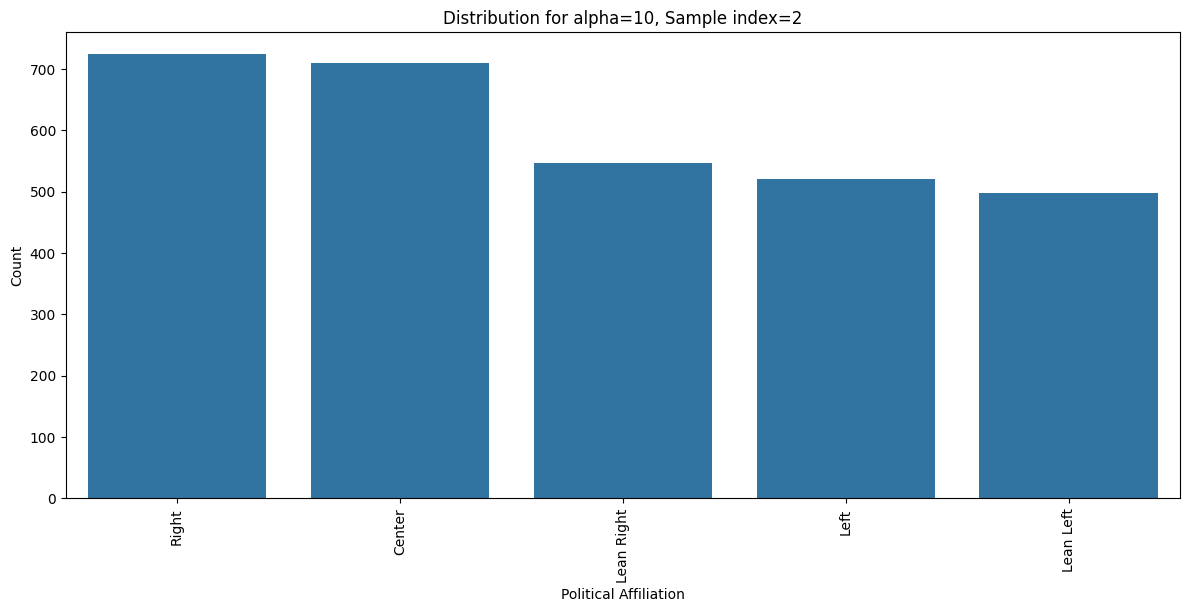

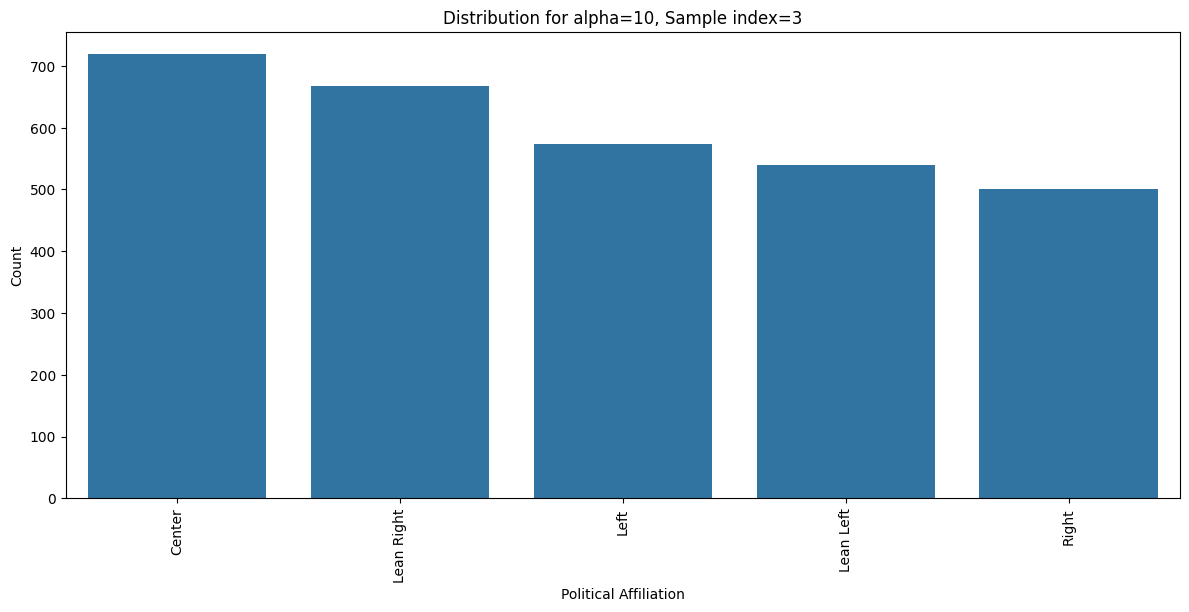

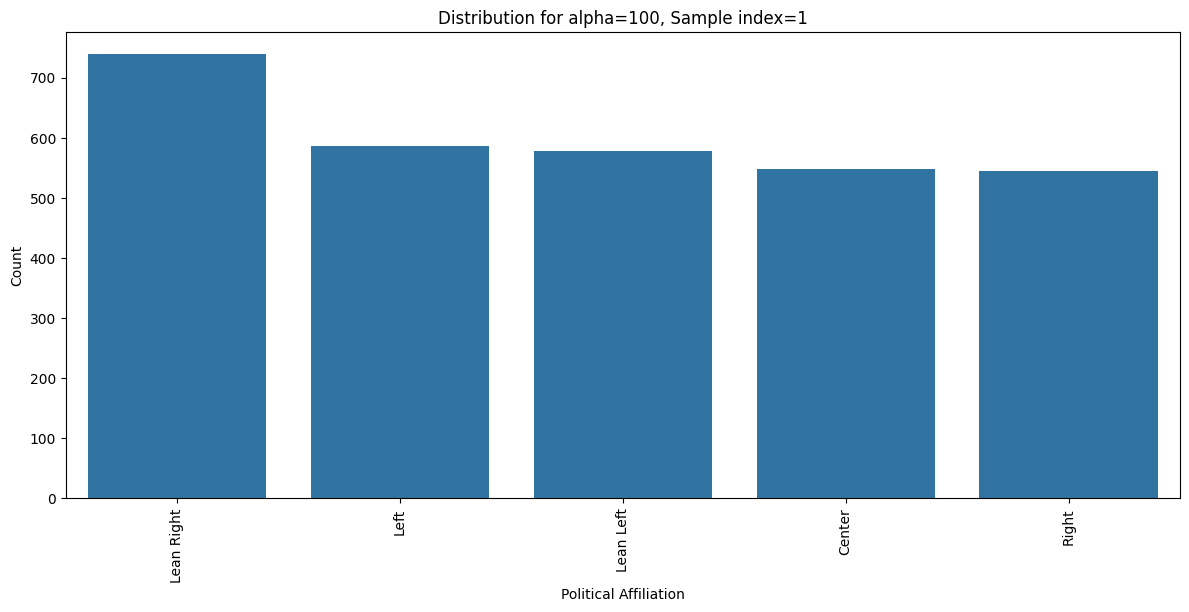

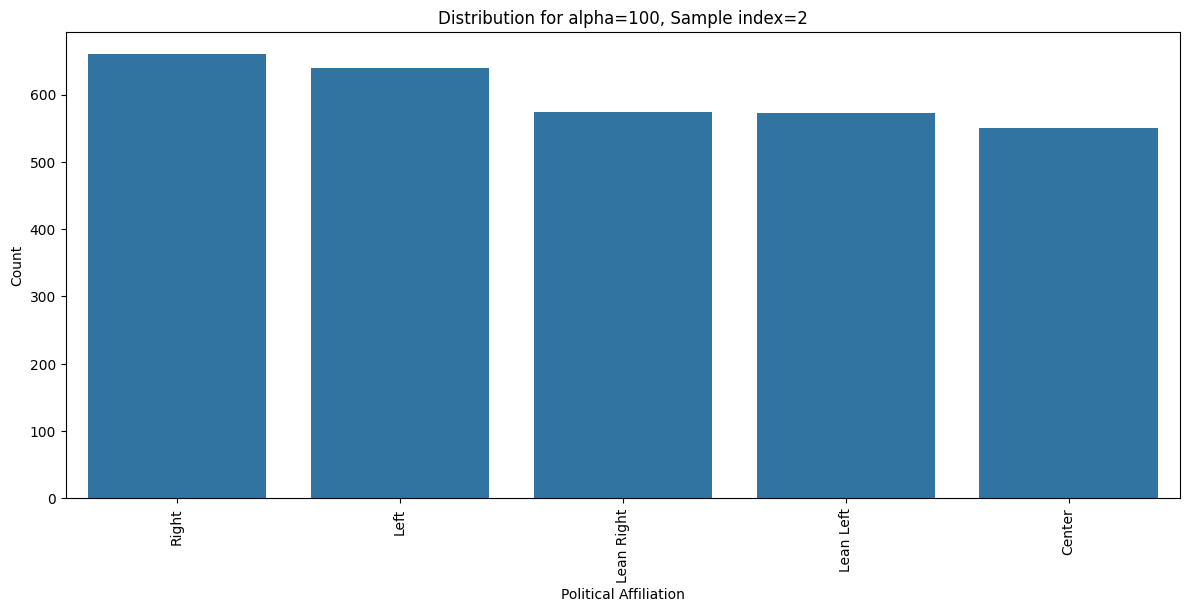

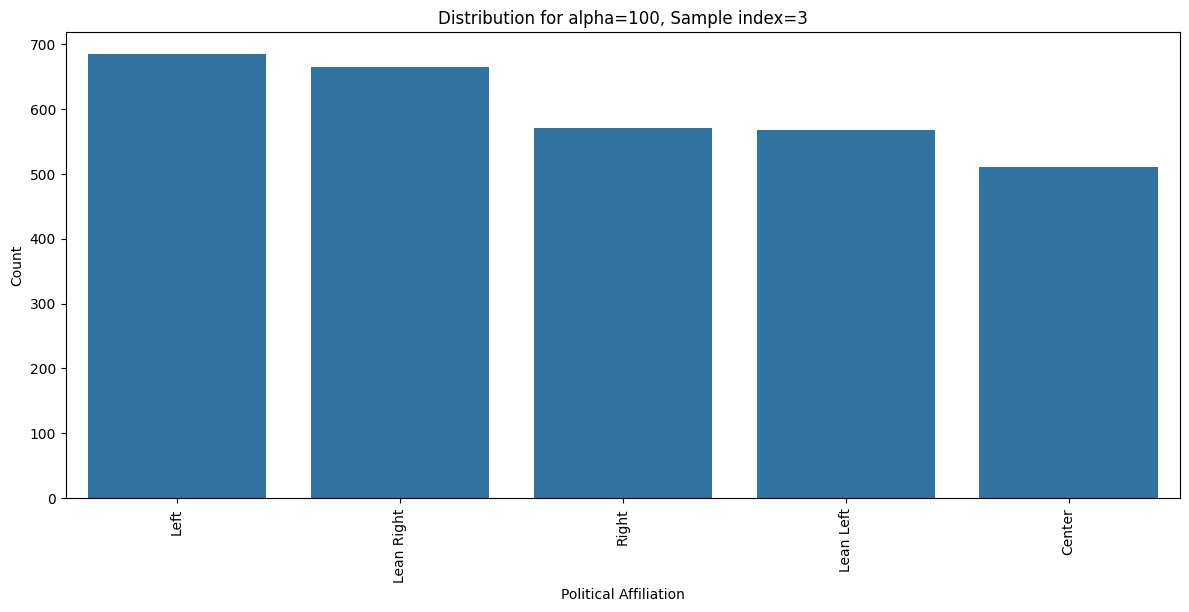

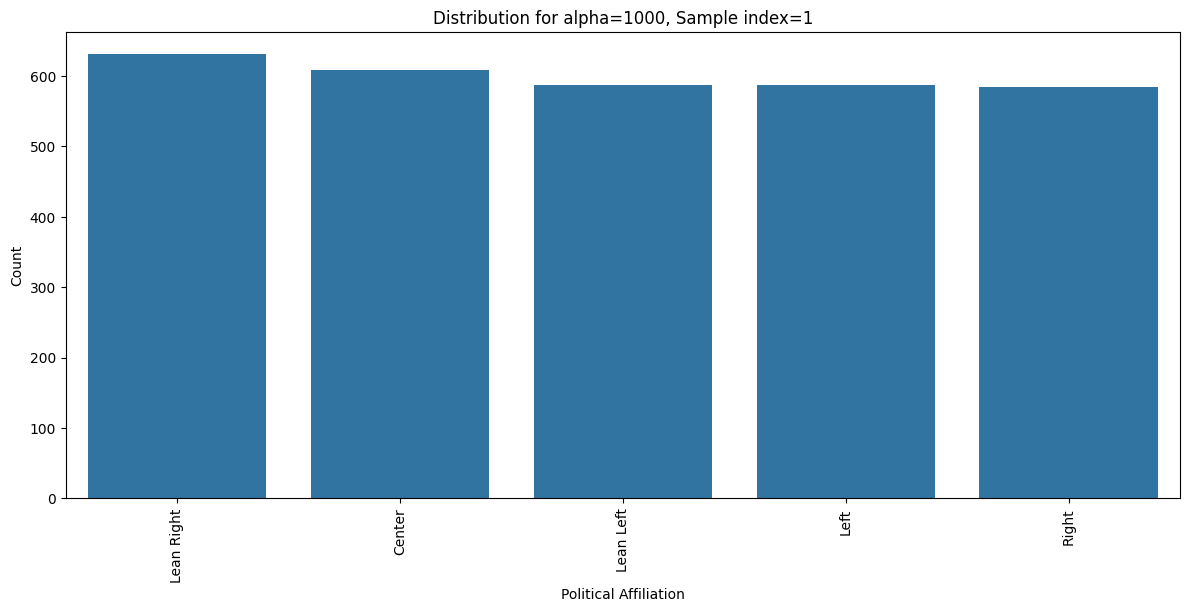

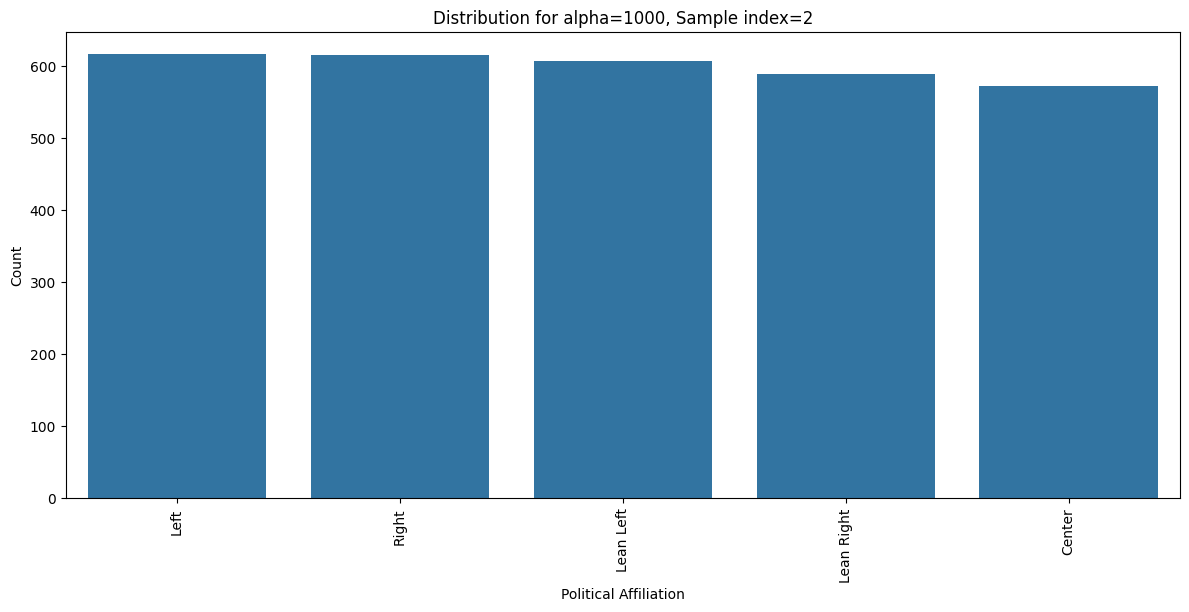

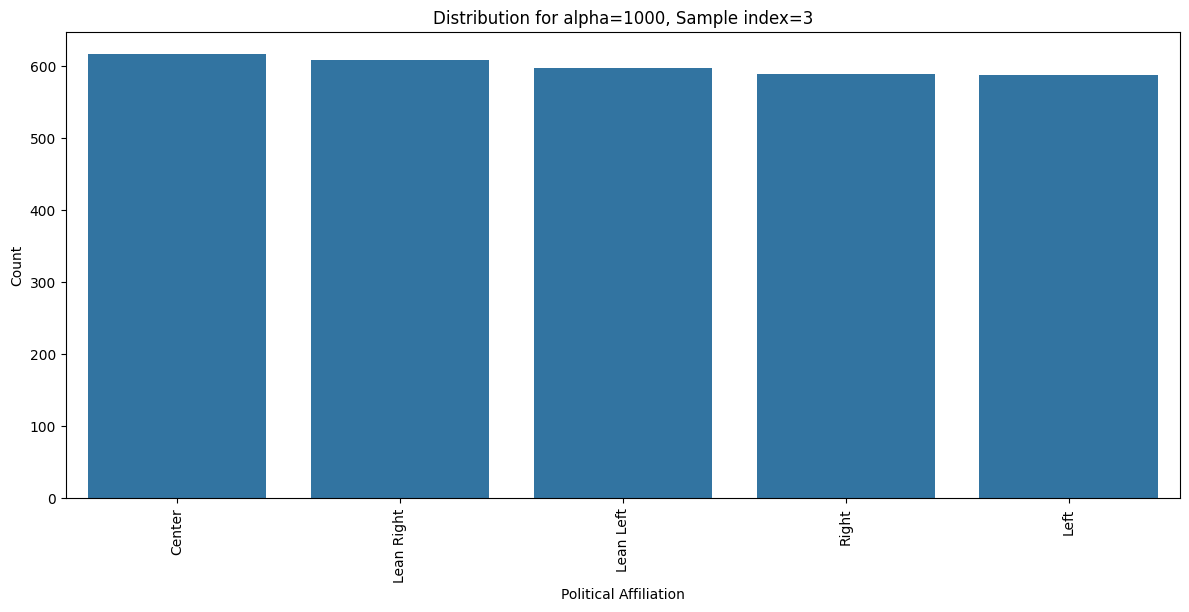

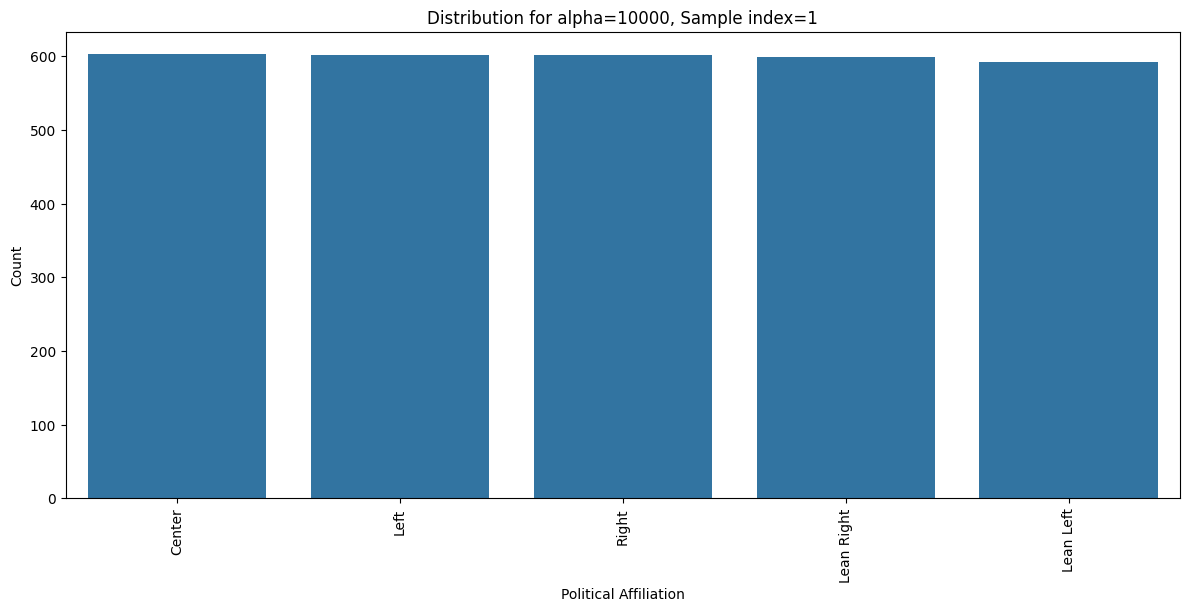

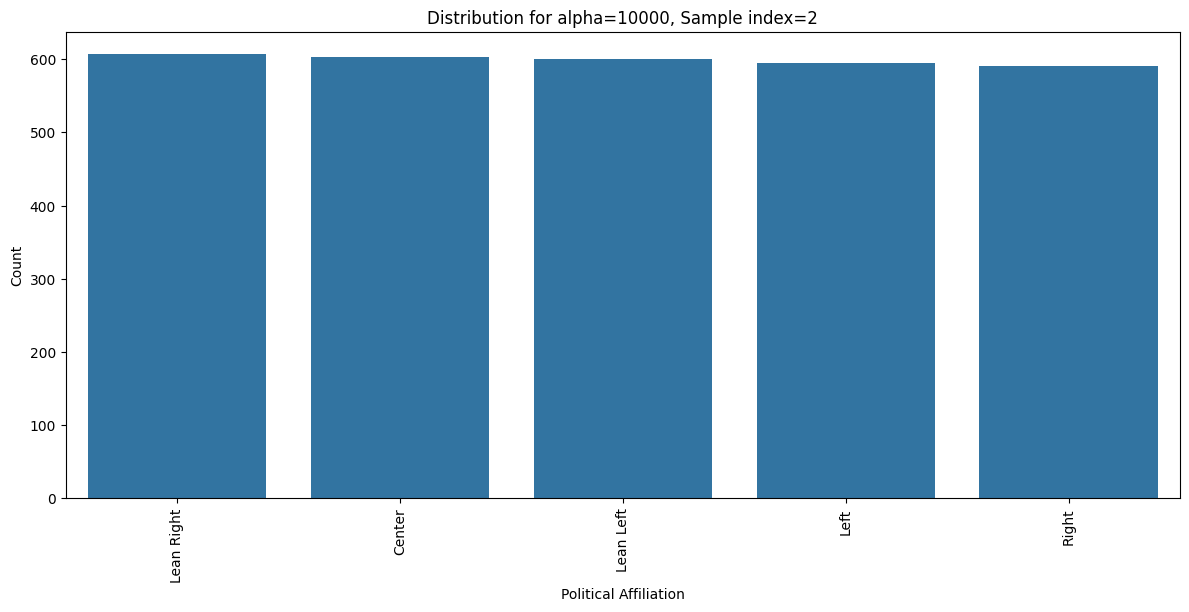

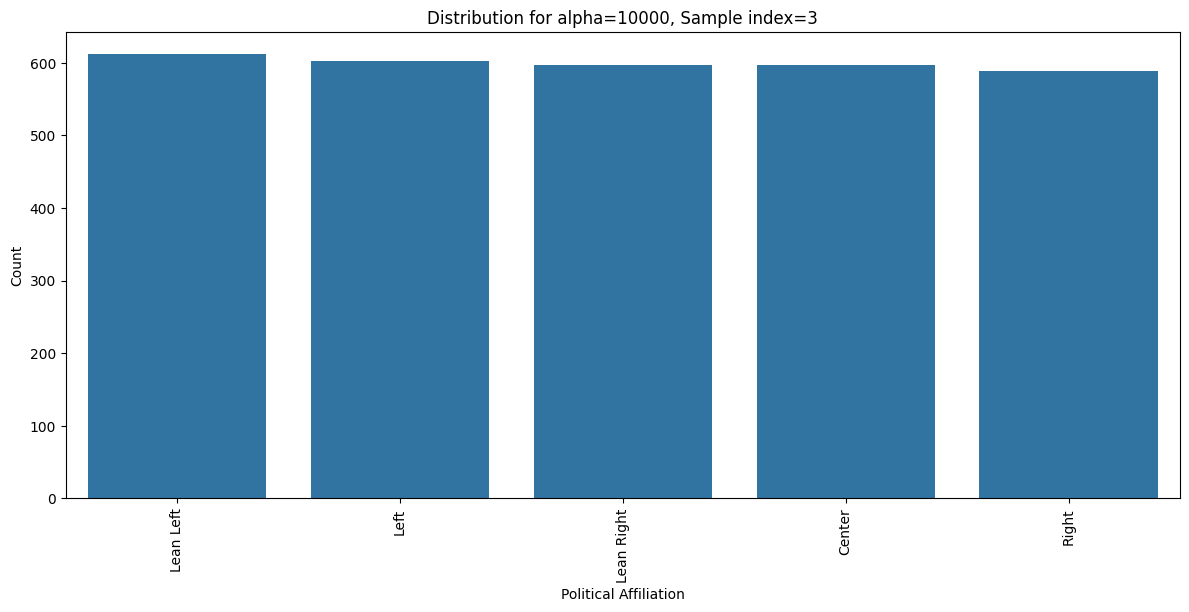

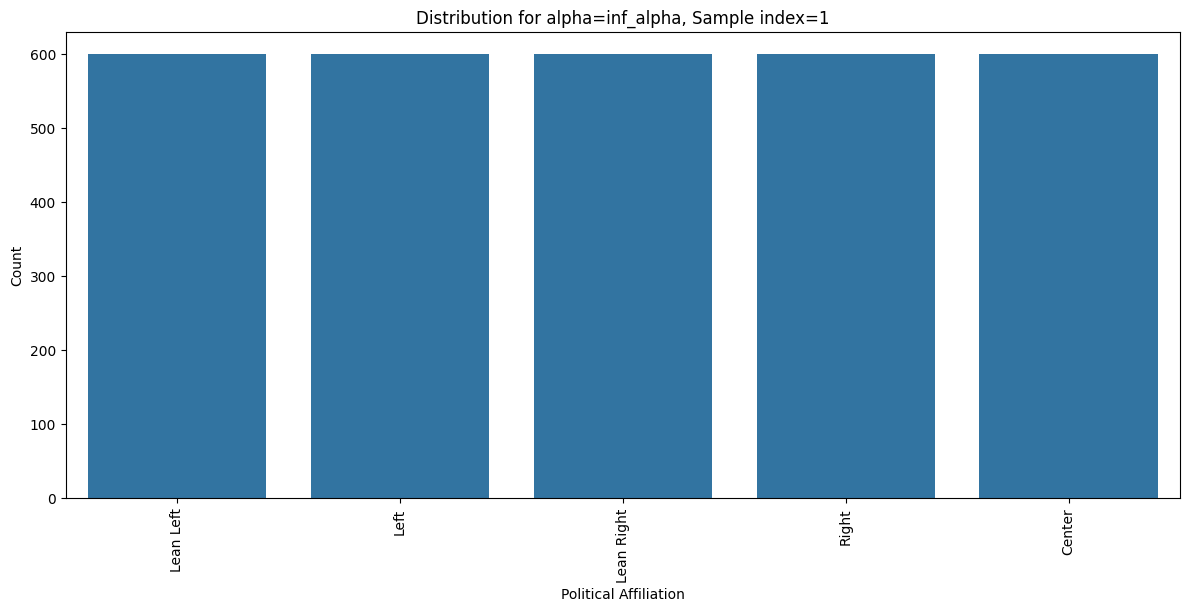

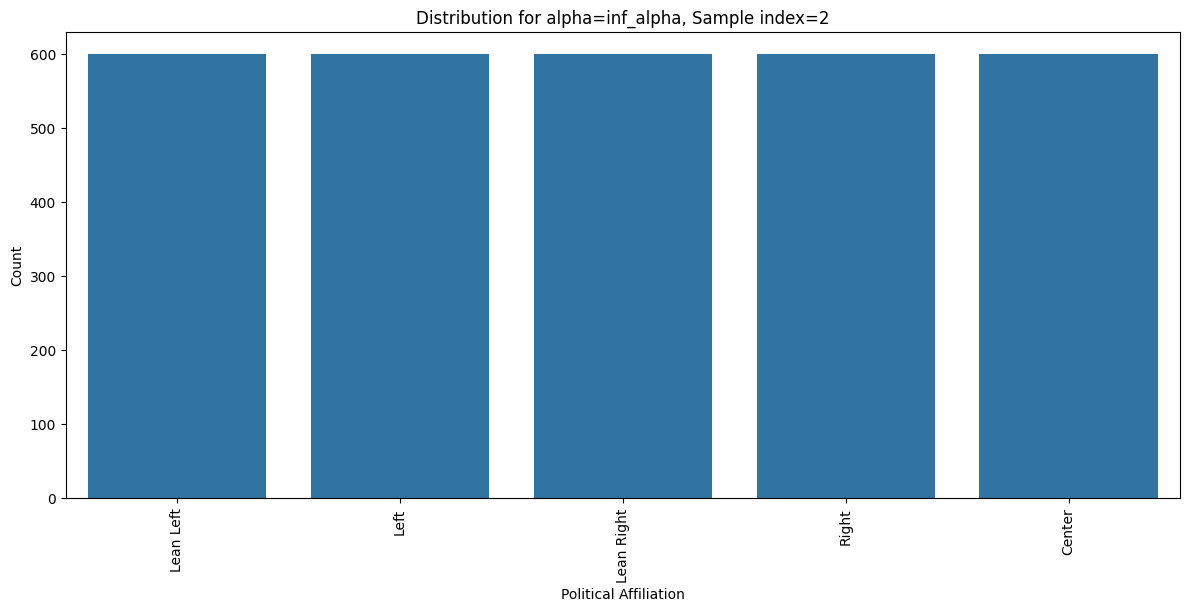

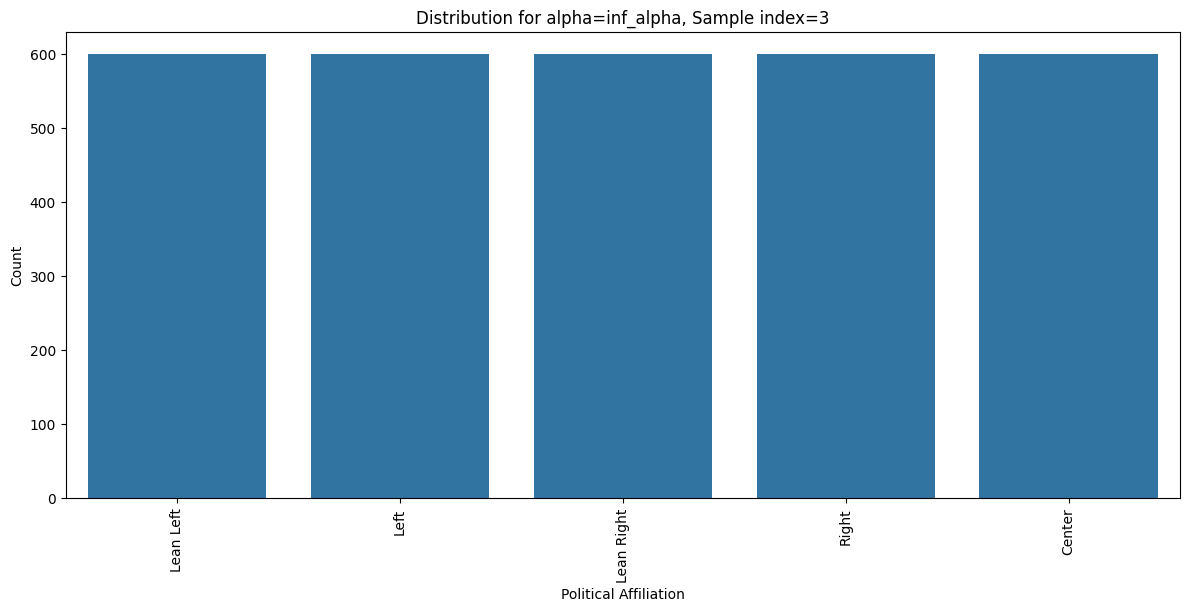

In [15]:
for (alpha, idx), sampled_df in subsamples.items():
    plot_distribution(sampled_df)
    plt.title(f"Distribution for alpha={alpha}, Sample index={idx}")